In [ ]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

In [19]:
# Converst Dates to Date Time
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%y')


In [21]:
# Group by month
monthly_sales = df.groupby([df['Order Date'].dt.to_period('M')])['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales = monthly_sales.sort_values('Date')


In [22]:
monthly_sales['Previous_Sales'] = monthly_sales['Sales'].shift(1)
monthly_sales = monthly_sales.dropna()


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = monthly_sales[['Previous_Sales']]
y = monthly_sales['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Prepare for Data Modeling.


In [16]:
# Create a copy to avoid warning.
model_data = monthly_sales.copy()

# Sort By Date
model_data.sort_values('Date')

# Use previous month Sales to predict next month.
model_data['Previous_Sales'] = model_data['Sales'].shift(1)

# Drop the first row.(it will have Nan in previous sales)
model_data = model_data.dropna()

In [ ]:
# Train a simple regression model
from sklearn.linear_model import Linnear_Regression
model= Linear_Regression
model.fit(X_train,y_train)

MSE: 3047617.017671714
R2 Score: -13.12071306363327


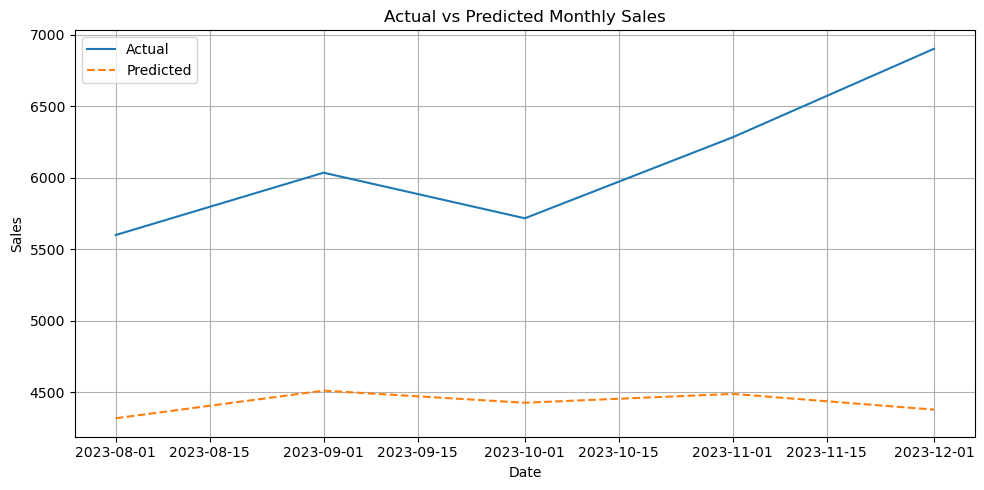

In [24]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'][-len(y_test):], y_test, label='Actual')
plt.plot(monthly_sales['Date'][-len(y_test):], y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.tight_layout()
plt.show()


In [25]:
import joblib

# Save model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [29]:
code = '''
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load model
model = joblib.load('model.pkl')

# Load data
df = pd.read_csv('sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')

# Preprocess
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales['Previous_Sales'] = monthly_sales['Sales'].shift(1)
monthly_sales = monthly_sales.dropna()

# Predict
latest = monthly_sales['Previous_Sales'].iloc[-1]
pred = model.predict([[latest]])[0]

# Streamlit app layout
st.title("📈 Sales Forecasting App")
st.write("Predicting next month's sales based on past data.")

# Display prediction
st.metric("📊 Predicted Next Month's Sales", f"${pred:,.2f}")

# Plot
st.subheader("📉 Monthly Sales Trend")
fig, ax = plt.subplots()
ax.plot(monthly_sales['Date'], monthly_sales['Sales'], label='Actual')
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.set_title("Monthly Sales")
st.pyplot(fig)
'''

# Fix: Save with utf-8
with open("app.py", "w", encoding="utf-8") as f:
    f.write(code)




In [ ]:
!streamlit run app.py
